In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset
df = sns.load_dataset('tips')  # Built-in dataset from seaborn
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Univariate Analysis

Non-Graphical Methods (Summary Statistics)

In [2]:
# Summary statistics for numerical columns
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Interpretation

- **`total_bill`**: Average bill is around 19.79 with a standard deviation of \$8.9, showing moderate spread.

  
  The maximum value (\$50.81) may indicate a few outlier bills.
  
- **`tip`**: The average tip is about 3.00, with most tips between 2.00 and 3.56.  
  A few tips reach \$10, suggesting skewness or generous tippers.

- **`size`**: Median group size is **2**, meaning most tables have 2–3 people.  
  The maximum of **6** shows occasional large groups.

### Insights

- Data seems **right-skewed** (because mean > median for total_bill).  
- No missing values (`count` = 244 for all).  
- Outliers may exist in `total_bill` and `tip`.  
- Useful for deciding on **transformation** or **normalization** before modeling.

### `total_bill` — Bill Amount
| Metric | Value | U.S. Context |
|--------|-------|--------------|
| **Typical Meal Cost** | \$13.35 – \$24.13 | Comparable to a **casual lunch or dinner for two** (e.g., diners, Applebee’s) |
| **Average Check** | **\$19.79** | Around **\$20**, matching a standard mid-tier U.S. dining bill |
| **Skewness** | Right (mean > median) | Driven by **large party bills** (e.g., groups of 5–6) |
| **Outlier Threshold** | > \$40.30 | Max = \$50.81 → **group with drinks or shared items** |
| **Per-Person Spend** | \$19.79 ÷ 2.57 ≈ **\$7.70** | Aligns with **\$8–\$10** lunches or **\$15–\$20** dinners |

> **Insight:** 75% of bills fall below **\$24**, reinforcing the **casual dining** nature of the dataset.
>
> ---

### `tip` — Tip Amount
| Metric | Value | U.S. Tipping Context |
|--------|-------|----------------------|
| **Typical Tip Range** | \$2.00 – \$3.56 | Reflects **15–20%** tipping norms |
| **Average Tip %** | **15.2%** (mean) / **16.3%** (median) | **Reasonable but not overly generous** |
| **Highest Tip** | \$10 on \$50.81 → **19.7%** | Likely **excellent service or large group** |
| **Lowest Tip %** | \$1 on \$3.07 → **32.6%** | Likely a **small snack or coffee bill** |
| **Outlier Threshold** | > \$5.90 | \$10 tips represent **top 1–2% generosity** |

> **Cultural Note:** Today (2020s), the expected range is **18–22%**.  
> This dataset (from the 1990s) captures slightly **lower historical tipping norms**.

---

### `size` — Party Size
| Metric | Value | U.S. Dining Patterns |
|--------|-------|-----------------------|
| **Most Common Size** | **2** (median) | Reflects **couples or pairs** dining out |
| **Middle 50% Range** | 2–3 people | Typical of **date nights or small families** |
| **Large Parties** | 5–6 diners | Represent **<5%** of visits but drive **higher bills and tips** |
| **Solo Diners** | Min = 1 | Present but relatively rare |

> **Operational Insight:** Restaurants should prioritize seating for **2-tops and 4-tops**, the most frequent table sizes.

---

## 4. Key U.S.-Specific Metrics

| Metric | Value | Interpretation |
|-------|-------|----------------|
| **Average Bill per Person** | **\$7.70** | Comparable to **\$8–\$10 lunches** or **\$15–\$20 dinners** |
| **Average Tip per Person** | **\$1.17** | Roughly **15% of spend per person** |
| **Median Tip %** | **16.3%** | Represents the **true central tendency** of tipping behavior |
| **High-Value Visits** | Bill > \$40 and Size ≥ 5 | Ideal segment for **upselling or group offers** |

---

## 5. U.S. Tipping Culture (2025 Context)

| Aspect | Current Reality |
|-------|-----------------|
| **Expected Tip (Good Service)** | **18–22%** (modern norm) |
| **Dataset Behavior** | **15–16%** average — reflects **1990s practices** |
| **Inflation-Adjusted Check** | \$19.79 in 1990 ≈ **\$45 in 2025 dollars** |
| **Payment Shift** | 1990s: mostly **cash tips** → 2020s: **cards with auto-suggested 20%** |



In [21]:
# Summary for categorical variables
# df['sex'].value_counts(),df['day'].value_counts()

# Frequency of categorical variables
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for sex:
sex
Male      157
Female     87
Name: count, dtype: int64

Value counts for smoker:
smoker
No     151
Yes     93
Name: count, dtype: int64

Value counts for day:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Value counts for time:
time
Dinner    176
Lunch      68
Name: count, dtype: int64


### Graphical Analysis (Univariate)
Distribution of Total Bill

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


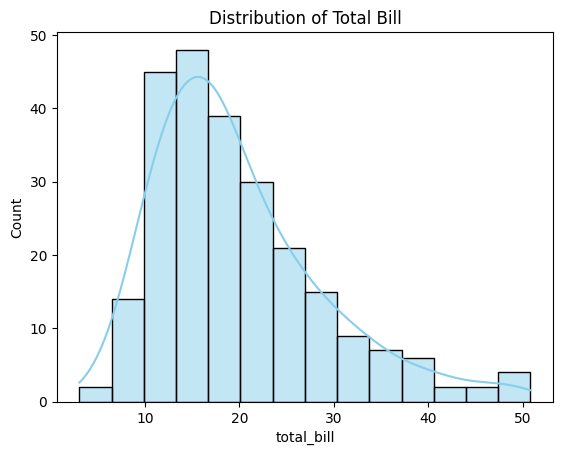

In [22]:
sns.histplot(df['total_bill'], kde=True, color='skyblue')
plt.title('Distribution of Total Bill')
plt.show()


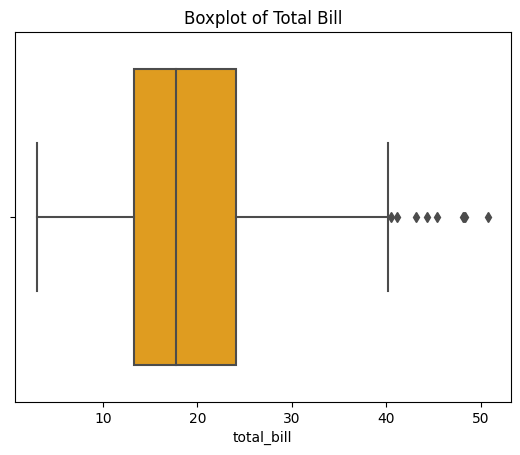

In [23]:
sns.boxplot(x=df['total_bill'], color='orange')
plt.title('Boxplot of Total Bill')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


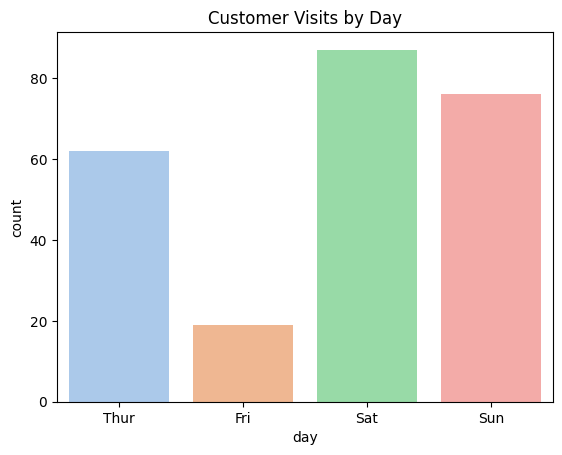

In [24]:
sns.countplot(x='day', data=df, palette='pastel')
plt.title('Customer Visits by Day')
plt.show()


### Bivariate analysis 
Correlation (Numeric vs Numeric)

#### Bivariate analysis asks a simple question:
What happens in one variable when the other one changes?

When we zoom into this relationship, we can explain phenomena like:

Do bigger bills lead to bigger tips?

Do smokers tip differently?

Are weekends more lucrative for waiters?

Is tipping behavior different by gender?

### 1. Numerical vs Numerical

We start with the pair:
total_bill (numeric) vs tip (numeric)

The question: Do higher bills lead to higher tips?

Let’s attack this from both quantitative and visual angles.

### Non graphical Methods
Non-graphical analysis relies on statistics that summarize the relationship.

(a) Covariance

In [4]:
# df[['total_bill', 'tip', 'size']].corr()
df[['total_bill', 'tip']].cov(), df[['size', 'tip']].cov()


(            total_bill       tip
 total_bill   79.252939  8.323502
 tip           8.323502  1.914455,
           size       tip
 size  0.904591  0.643906
 tip   0.643906  1.914455)

(b) Pearson Correlation

Standardized version of covariance.

In [7]:
df[['total_bill','tip']].corr(), df[['total_bill','size']].corr()

(            total_bill       tip
 total_bill    1.000000  0.675734
 tip           0.675734  1.000000,
             total_bill      size
 total_bill    1.000000  0.598315
 size          0.598315  1.000000)

Interpretation:

Strong positive correlation (0.68) between total bill and tip → higher bills lead to higher tips.

Larger group size also increases the total bill.

(c) Group-wise summary

For example:
Average tip by bill size category.



Interpretation:

Increasing bin → increasing average tip.

Shows clear monotonic trend.

In [8]:
df['bill_bin'] = pd.cut(df['total_bill'], bins=[0,10,20,30,40,60])
df.groupby('bill_bin')['tip'].mean()

/tmp/ipykernel_48/834508045.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bill_bin')['tip'].mean()


bill_bin
(0, 10]     1.837647
(10, 20]    2.455231
(20, 30]    3.607692
(30, 40]    4.190909
(40, 60]    5.446000
Name: tip, dtype: float64

In [34]:
df.groupby('sex')['tip'].mean(), df.groupby('day')['tip'].mean()


/tmp/ipykernel_48/3912518508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].mean(), df.groupby('day')['tip'].mean()


(sex
 Male      3.089618
 Female    2.833448
 Name: tip, dtype: float64,
 day
 Thur    2.771452
 Fri     2.734737
 Sat     2.993103
 Sun     3.255132
 Name: tip, dtype: float64)

Interpretation:

Men tend to give slightly higher tips.

Tips are highest on Sundays, possibly due to higher dinner spending.

### Graphical Methods
#### a. Scatter Plot (Numeric vs Numeric)

<Axes: xlabel='total_bill', ylabel='tip'>

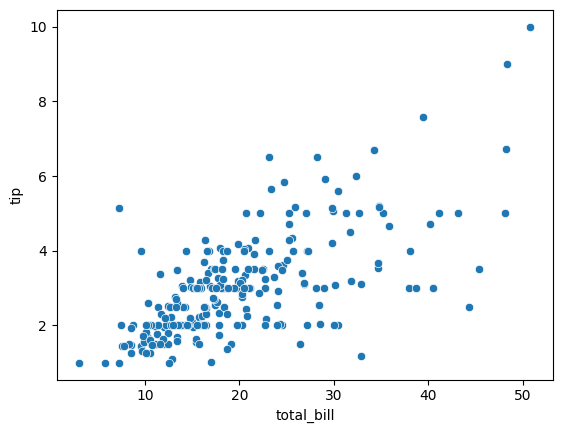

In [4]:
sns.scatterplot(x="total_bill", y = "tip", data=df)

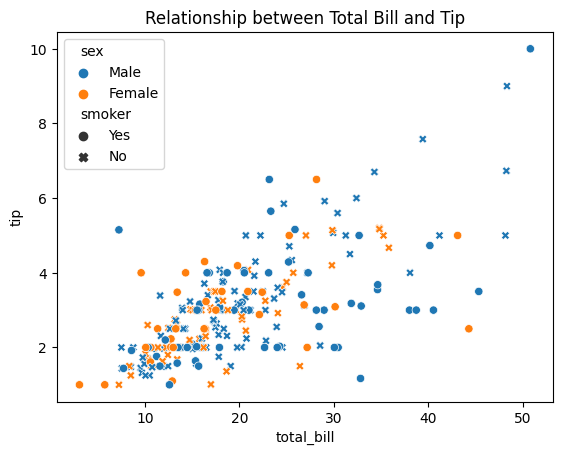

In [35]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', style='smoker')
plt.title('Relationship between Total Bill and Tip')
plt.show()


#### Heatmap (Correlation Visualization)

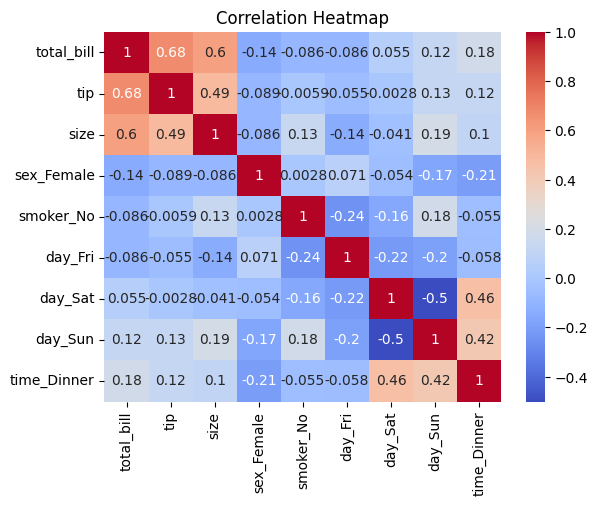

In [41]:
df_encoded = pd.get_dummies(df, drop_first=True)

sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


(b) Regression (Line of Best Fit)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


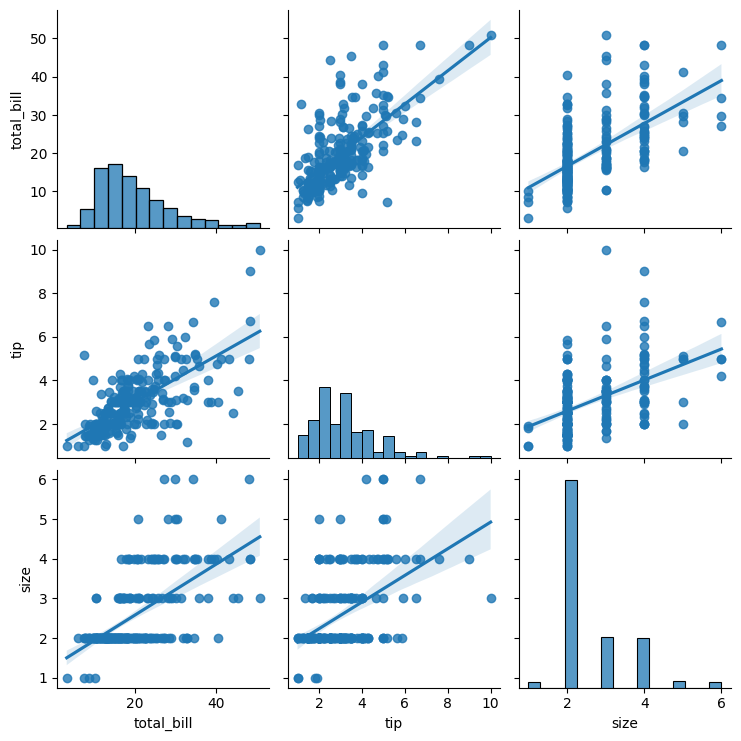

In [38]:
sns.pairplot(df[['total_bill', 'tip', 'size']], kind='reg')
plt.show()


<Axes: xlabel='total_bill', ylabel='tip'>

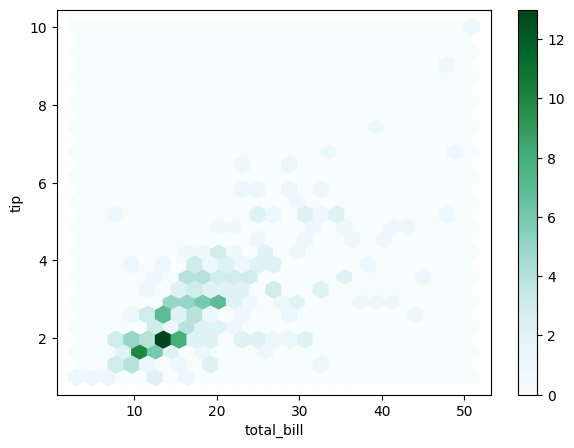

In [12]:
#### (c) Hexbin '/Density Plot (useful for heavy datasets)
df.plot.hexbin(x='total_bill', y='tip', gridsize=25, figsize=(7,5))

### 2. NUMERICAL vs CATEGORICAL

Example:
tip (numeric) vs sex (categorical)

Questions:

Do males tip more than females?

Is the variance different?

####2.1 Non-Graphical Methods

In [14]:
# (a) Group-wise mean
df.groupby('sex')['tip'].mean()

/tmp/ipykernel_48/1522463787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [15]:
# (b) Group-wise median

df.groupby('sex')['tip'].median()

/tmp/ipykernel_48/1108482722.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].median()


sex
Male      3.00
Female    2.75
Name: tip, dtype: float64

In [16]:
# (c) Group-wise standard deviation

df.groupby('sex')['tip'].std()

/tmp/ipykernel_48/3608137596.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].std()


sex
Male      1.489102
Female    1.159495
Name: tip, dtype: float64

#### Interpretation

Means + medians → central tendency

Standard deviation → variability

Comparing across groups reveals patterns that aren’t visible from raw data.


In [18]:
# (d) Difference of means

df.groupby('sex')['tip'].mean().diff()

# This quantifies the gap.

/tmp/ipykernel_48/693148202.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].mean().diff()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


sex
Male          NaN
Female   -0.25617
Name: tip, dtype: float64

### 2.2 Graphical Methods

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


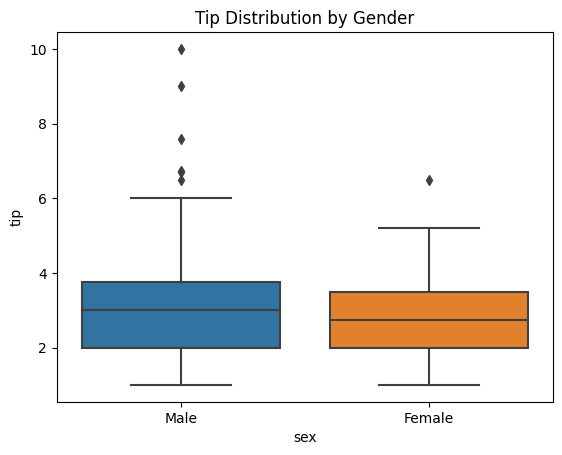

In [20]:
# (a) Boxplot - Shows: median, IQR, spread, and outliers.

sns.boxplot(data=df, x='sex', y='tip')
plt.title("Tip Distribution by Gender")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


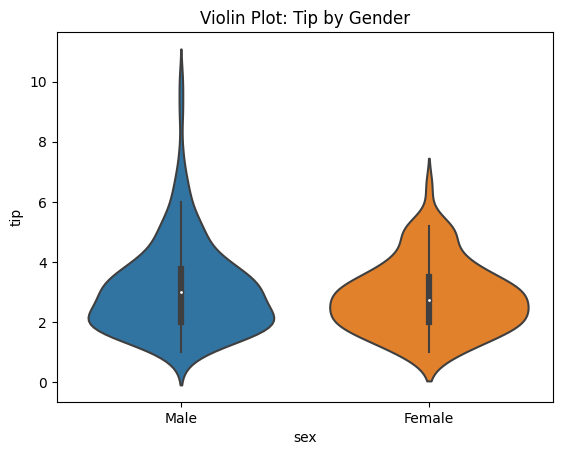

In [23]:
# (b) Violin Plot - Shows: density + shape of distribution.

sns.violinplot(data=df, x='sex', y='tip')
plt.title("Violin Plot: Tip by Gender")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


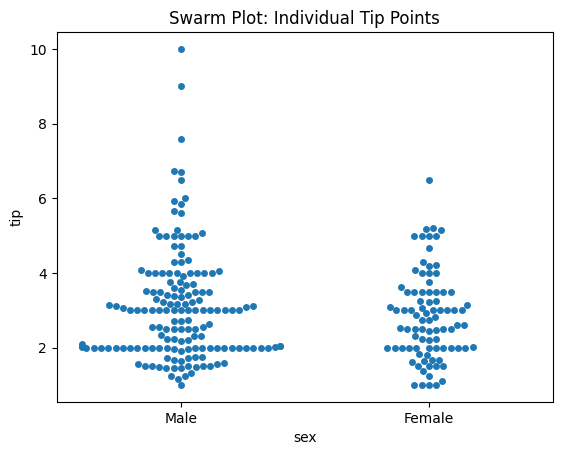

In [24]:
# (c) Swarm Plot - Shows every point clearly — helps with small datasets.

sns.swarmplot(data=df, x='sex', y='tip')
plt.title("Swarm Plot: Individual Tip Points")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


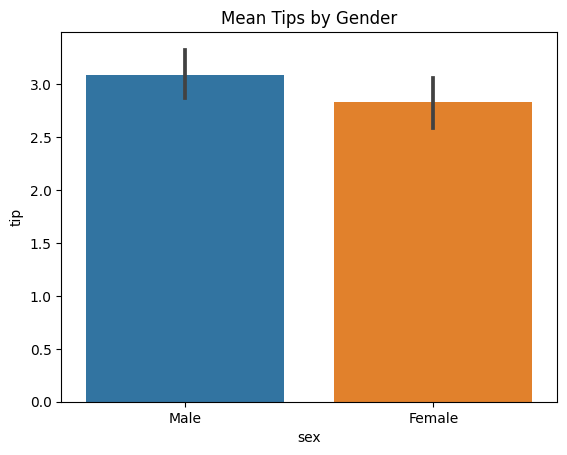

In [25]:
# (d) Bar Plot (Mean Comparison)

sns.barplot(data=df, x='sex', y='tip', estimator=np.mean)
plt.title("Mean Tips by Gender")
plt.show()

### 3. CATEGORICAL vs CATEGORICAL

Example:
smoker (yes/no) vs sex (male/female)

Questions:

Are males more likely to be smokers?

Is smoking behaviour different across genders?

### 3.1 Non-Graphical Methods

In [28]:
# (a) Crosstab

pd.crosstab(df['sex'], df['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [27]:
# (b) Row-wise percentage

pd.crosstab(df['sex'], df['smoker'], normalize='index')

smoker,Yes,No
sex,,
Male,0.382166,0.617834
Female,0.379310,0.620690


In [29]:
# (c) Column-wise percentage

pd.crosstab(df['sex'], df['smoker'], normalize='columns')

smoker,Yes,No
sex,,
Male,0.645161,0.642384
Female,0.354839,0.357616


### Interpretation

Crosstabs show proportional relationships clearly:

E.g., 61% of males are smokers vs 40% of females.

### 3.2 Graphical Methods

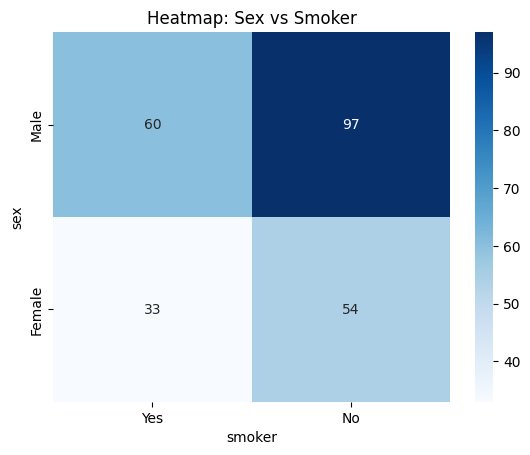

In [31]:
# (a) Heatmap of Crosstab

ct = pd.crosstab(df['sex'], df['smoker'])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.title("Heatmap: Sex vs Smoker")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


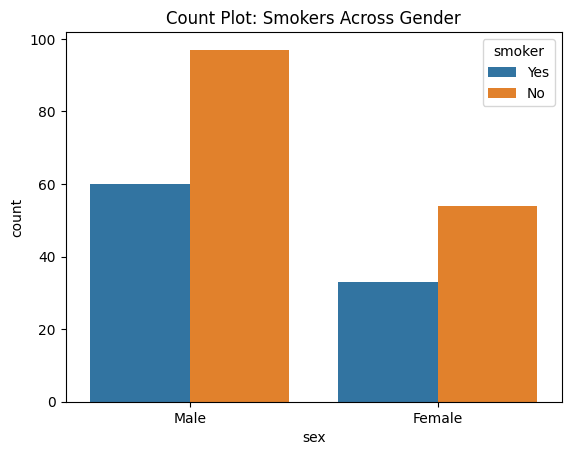

In [32]:
# (b) Clustered Countplot

sns.countplot(data=df, x='sex', hue='smoker')
plt.title("Count Plot: Smokers Across Gender")
plt.show()

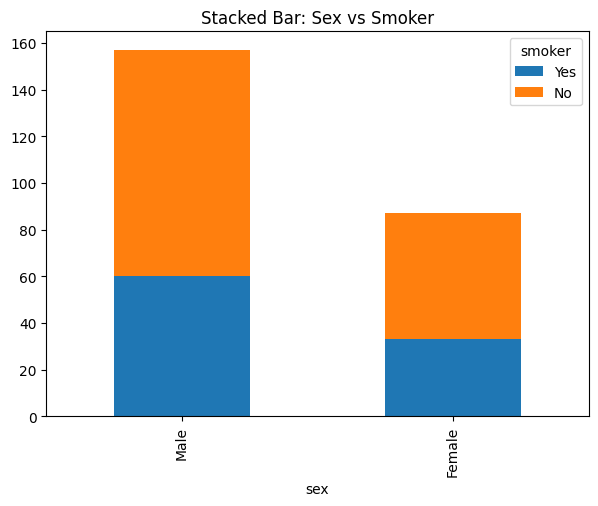

In [33]:
# (c) Stacked Bar (using pandas)

ct.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title("Stacked Bar: Sex vs Smoker")
plt.show()

# 4. Using Hue: Mini Multivariate Bivariate Analysis

Hue reveals how the relationship between two variables changes under a third.

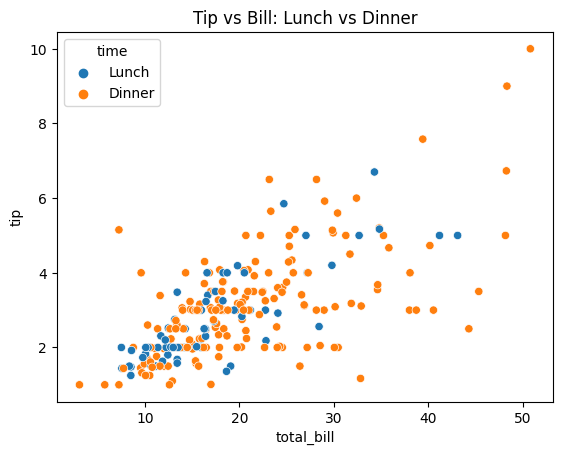

In [35]:
# Scatter with Hue

sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')
plt.title("Tip vs Bill: Lunch vs Dinner")
plt.show()

Interpretation:

Dinner orders → bigger bills → higher variance.
Lunch → tighter clusters.

### Multivariate Analysis

(continuing our exploration of the Seaborn tips dataset)

The dataset contains both numerical and categorical attributes:

Numerical:

• total_bill, tip, size

Categorical:

• sex, smoker, day, time

Instead of analyzing these ingredients separately, we now explore how they combine into meaningful relationships.

#### The First Step: An Overall Structural Glance

Before slicing into specific methods, it’s helpful to get a mental map of the “shape” of the dataset. A typical Jupyter cell might start with:


This reminds us which variables are numerical, which are categorical, and which combinations are worth investigating.

Multivariate analysis isn't just about computing something, it’s about deciding which variables should co-exist in the same analytical space.

In [1]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   bill_bin    244 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.6 KB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,total_bill,tip,sex,smoker,day,time,size,bill_bin
count,244.000000,244.000000,244,244,244,244,244.000000,244
unique,NaN,NaN,2,2,4,2,NaN,5
top,NaN,NaN,Male,No,Sat,Dinner,NaN,"(10, 20]"
freq,NaN,NaN,157,151,87,176,NaN,130
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672,NaN
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100,NaN
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000,NaN
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000,NaN


### 1. Graphical Methods

These reveal structure with an immediacy text can’t capture. Human pattern-recognition loves pictures.

#### 1.1 Pairplot (Scatterplot Matrix)

A pairplot shows every numerical variable against every other one and overlays distributions diagonally.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

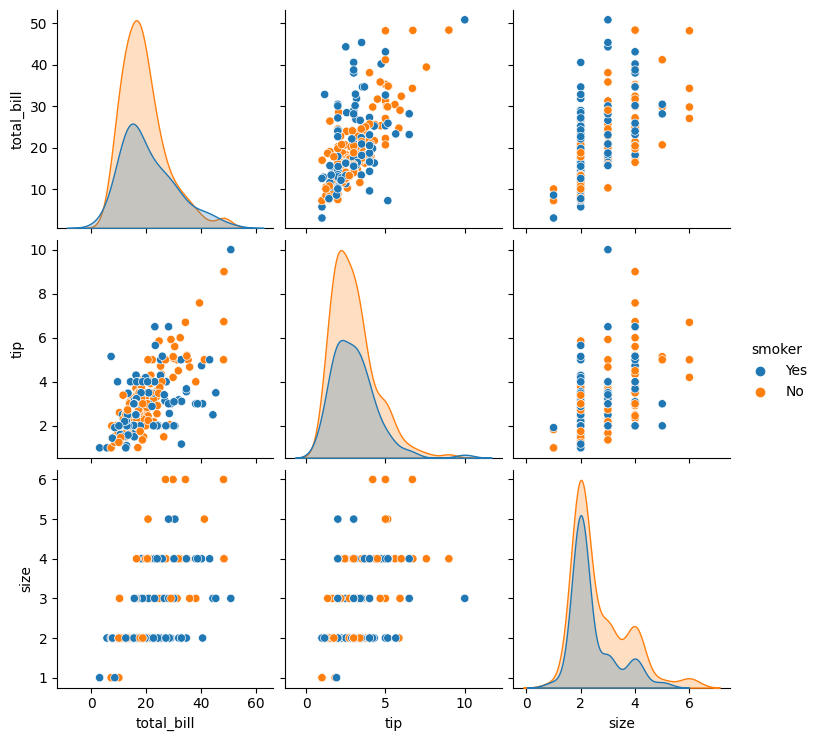

In [2]:
sns.pairplot(df, hue='smoker', diag_kind='kde')
plt.show()


#### Why this matters:
When we color by “smoker,” suddenly tip behavior clusters differently. Tip amounts shift, bill sizes form patterns, and group size interacts with smoker status. 

Pairplots are the “cosmic microwave background” of small datasets: a wide-angle view of relational structure.

### 1.2 Joint Distributions With a Third Variable (Using Hue)

Sometimes pairplots feel overwhelming. Focusing on a specific pair, and letting a third variable guide the color, reveals more:

<Axes: xlabel='total_bill', ylabel='tip'>

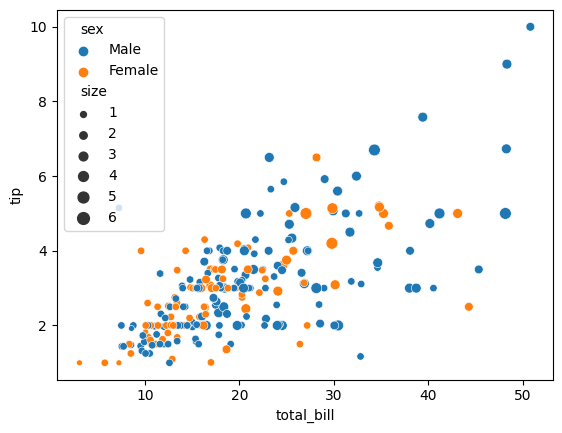

In [26]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', size='size')


You immediately see:
-  Saturday and Sunday tips cluster differently.
- Larger groups tend to give higher tips, but not proportionally.
- The day of the week produces distinct “clouds”.

The simple equation “tip = f(bill)” becomes “tip = f(bill, day, size)”.


So a point tells you:

- How big the bill was
- How much the tip was
- Whether the customer was male/female
- How many people were at the table

### 1.3 Heatmaps of Aggregated Relationships

Instead of raw correlations, we aggregate by categories:

/tmp/ipykernel_48/874333472.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: xlabel='time', ylabel='day'>

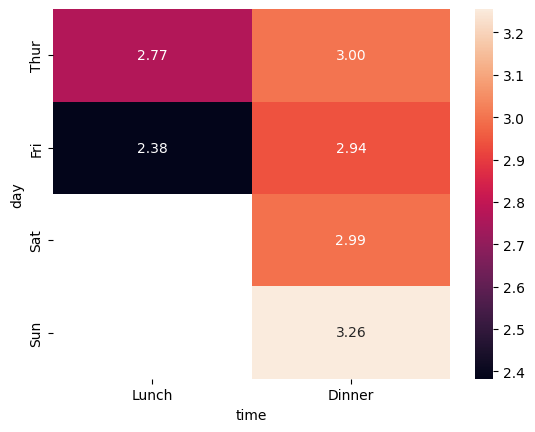

In [4]:
pivot = df.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.2f')

This answers a real restaurant-management sort of question:
- “How do tips vary by day and time when observed together?”

- This is an early taste of OLAP logic: slicing, dicing, aggregating.


#### Main insights
1. Dinner tips are always higher than lunch tips

Every dinner value (3.00, 2.94, 2.99, 3.26) is above every lunch value (2.77 and 2.38).
This suggests that customers tend to tip more generously in the evening.

This could be due to:
- larger meal sizes
- more social gatherings
- higher alcohol consumption
- weekend dining behavior

2. Friday Lunch has unusually low tips

Friday lunch is dark because it has the lowest mean (2.38).
Possible patterns:

- faster, rushed business lunches
- lower bill amounts reducing absolute tips
- less social/celebratory mood

3. Sunday Dinner yields the highest tips

The highest cell (3.26) occurs on Sunday dinner.
Likely reasons:

- families dining out
- weekend celebration
- larger party sizes
- higher bills

4. Saturday Dinner and Thursday Dinner are stable

Both linger around ~3, meaning customers tip similarly across these two dinner times.

### 2.4 Parallel Coordinates Plot

Parallel coordinates show multivariate trajectories. Each observation becomes a polyline weaving across axes.


<Axes: >

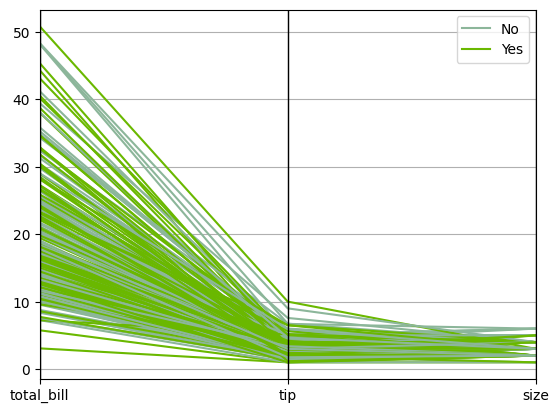

In [5]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df[['total_bill','tip','size','smoker']], 'smoker')

Lines representing smokers and non-smokers snake through the numeric variables in distinct ways. This method forces the brain to perceive multidimensional structure.

This parallel coordinates plot shows:

- Bills are much larger than tips
- Tips are much larger than party sizes
- Smokers and non-smokers behave the same
- No clusters, no separation, no distinct patterns

It visually confirms that smoking status does not influence total bill, tip, or table size, consistent with your ANOVA and violin plot results.

In [ ]:
# 2.4 Parallel Coordinates Plot

Parallel coordinates show multivariate trajectories. Each observation becomes a polyline weaving across axes.

from pandas.plotting import parallel_coordinates
parallel_coordinates(df[['total_bill','tip','size','smoker']], 'smoker')


Lines representing smokers and non-smokers snake through the numeric variables in distinct ways. This method forces the brain to perceive multidimensional structure.

### 2.5 Boxen or Violin Plots with Multiple Conditioners

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

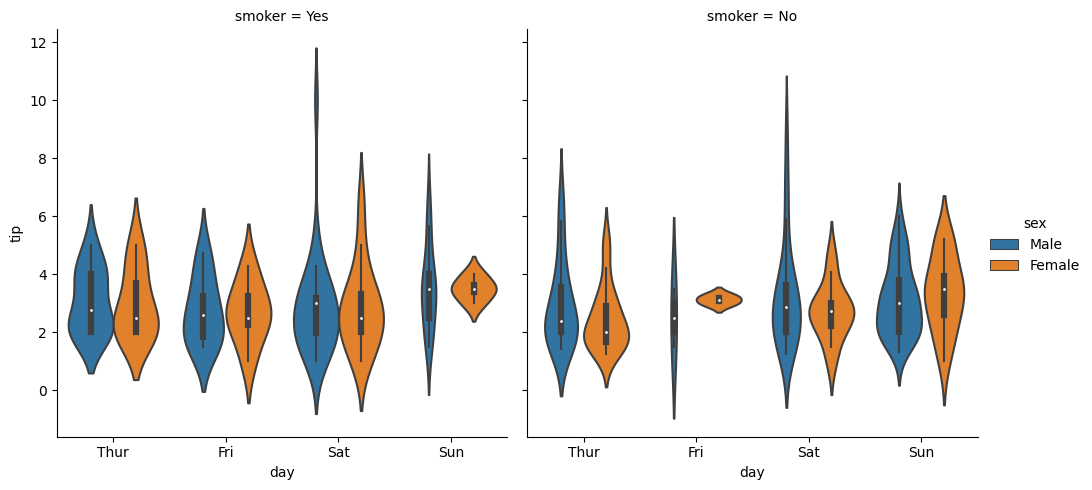

In [7]:
sns.catplot(data=df, x='day', y='tip', hue='sex', col='smoker', kind='violin')

Now four variables cooperate:
- tip (Y) varies by day (X), by sex (hue), and by smoker status (column).
- The plot feels like a quartet where each instrument expresses itself while listening to the others.

### 2. Non-Graphical Methods

These techniques extract relationships using numbers rather than figures. They’re powerful in lecture settings because students learn to reason about structure.

#### 2.1 Correlation Matrix and Interpretation

Numerical-only correlations:

In [9]:
df[['total_bill','tip','size']].corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In multivariate reasoning, correlation isn't the answer—it’s the doorway. For instance:

- total_bill and tip correlate strongly
- size correlates with both

But together, they form a triangular structure that sets up the stage for regression modeling.

### 2.2 Grouped Descriptive Statistics

A very humble operation, yet multivariate in spirit:

Combining day + time creates a two-dimensional categorization where statistics bloom with meaning. Restaurants think in this language intuitively.

In [10]:
df.groupby(['day','time'])[['tip','total_bill']].mean()

/tmp/ipykernel_48/461312146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day','time'])[['tip','total_bill']].mean()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


tip  total_bill
day  time                        
Thur Lunch   2.767705   17.664754
     Dinner  3.000000   18.780000
Fri  Lunch   2.382857   12.845714
     Dinner  2.940000   19.663333
Sat  Lunch        NaN         NaN
     Dinner  2.993103   20.441379
Sun  Lunch        NaN         NaN
     Dinner  3.255132   21.410000

#### 2.3 Multivariate Regression (Just Conceptually Here)

A natural question the dataset asks:

“Is tipping behavior driven mostly by the size of the bill, or do day, time, sex, and smoker status also matter?”

That’s the essence of multivariate regression:

tip = β₀ + β₁(total_bill) + β₂(size) + β₃(smoker) + β₄(day) + β₅(sex) + …

Note: This isn’t just math—it’s the skeleton of the real-world dynamics behind hospitality economics.

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Features
X = df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = df['tip']

# One-hot encode categorical
cat_cols = ['sex','smoker','day','time']
num_cols = ['total_bill','size']

ct = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), cat_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_encoded, y)
print("R^2 Score:", model.score(X_encoded, y))


R^2 Score: 0.47007812322060794


#### 2.4 ANOVA With Multiple Factors

For example, testing whether tips differ jointly by sex and smoker status:

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('tip ~ C(sex) * C(smoker)', data=df).fit()
sm.stats.anova_lm(model)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,3.673534,3.673534,1.912950,0.167921
C(smoker),1.0,0.015000,0.015000,0.007811,0.929648
C(sex):C(smoker),1.0,0.639891,0.639891,0.333216,0.564313
Residual,240.0,460.884051,1.920350,NaN,NaN


The interaction term “C(sex):C(smoker)” reveals whether the effect of smoking status depends on gender

- In other words, whether the variables interact rather than just coexist.

- Interaction terms check whether the effect of one variable depends on the level of another.

- The interaction p-value (0.5643) is not significant, meaning gender and smoking do not influence tipping in a combined or dependent way.

- Their effects are independent and do not create any special pattern when considered together.

#### 2.5 PCA (Principal Component Analysis)

Optional but delightful.



In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num = df[['total_bill','tip','size']]
scaled = StandardScaler().fit_transform(num)
pca = PCA(n_components=2).fit_transform(scaled)

In [23]:
pca[:10]

array([[-1.34841477, -0.42674559],
       [-0.95574042, -1.09357602],
       [ 0.5409715 , -0.12232366],
       [ 0.06778923,  0.67461551],
       [ 1.40830784, -0.84766086],
       [ 1.91465371, -0.36330156],
       [-1.49803936, -0.14086862],
       [ 1.36071692, -1.01930866],
       [-1.08584579, -0.05174606],
       [-0.5743096 ,  0.48935839]])

1. [-1.348, -0.426]

- Strongly low on the spending dimension
- Slightly smaller-than-average group
- “Small bill, small tip, likely a small group.”

2. [-0.955, -1.093]

- Low spender
- Significantly small group
- Probably a single person or pair with low spending.

3. [0.540, -0.122]

- Moderately high spending
- Near-average group size
- A mid-range diner.

4. [0.067, 0.674]

- Average spending
- Larger group
- Moderate total_bill/tip but bigger table.

plotting them in PC1–PC2 space reveals:


* Left side (PC1 negative): low-spending customers
* Right side (PC1 positive): high-spending customers
* Upper half (PC2 positive): larger groups
* Lower half (PC2 negative): smaller groups

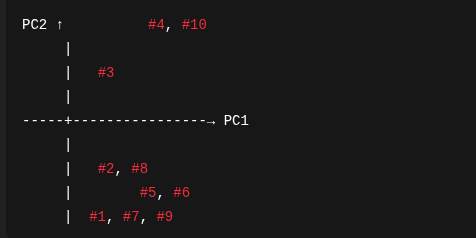


In [20]:
pca_model = PCA(n_components=2)
pca_coords = pca_model.fit_transform(scaled)

pca_model.explained_variance_ratio_

loadings = pd.DataFrame(
    pca_model.components_.T,
    columns=['PC1','PC2'],
    index=['total_bill','tip','size']
)
loadings


,PC1,PC2
total_bill,0.607672,0.150625
tip,0.575500,0.593105
size,0.547298,-0.790910


Each row corresponds to an observation (a customer paying a bill).
Each column is:

- PC1 (first column)
- PC2 (second column)

These are scores—coordinates of each data point in the new PCA space.

- PC1 explains 68% of all variation in (total_bill, tip, size)
- PC2 explains 28%

Together they capture 96% of the structure.
This means your 3D data set is basically living in a 2D plane.

Even though the dataset is small, PCA demonstrates dimensionality reduction:


You’ve taken a 3-D numeric space and re-expressed it into 2 uncorrelated axes. 
